In [10]:
# sys — allows Python to interact with the system, especially things like the module search path.
# os — used for path handling (important for loading files and scripts).
# pandas (pd) — a powerful library for loading, cleaning, transforming, and analyzing data.
# datetime — handles date and time values (not used here but often part of data pipelines).

In [11]:
import sys
import os
import pandas as pd
from datetime import datetime

In [12]:
# Add the '../scripts' directory to the Python module search path.
# This allows us to import modules from that directory, 
# facilitating better organization of our code and access to shared scripts.
sys.path.append(os.path.abspath('../scripts'))

In [13]:
# We import two custom Python files you created:
# data_processing.py → handles loading, encoding, scaling
# model.py → handles model training, evaluation, plotting
# This maintains modularity and clean project structure.

import data_processing as dp
import model as m

### Loading and cleaning data

In [14]:
filepath = '../data/raw/insurance.csv'
data = dp.load_and_clean_data(filepath)
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### ENCODING & SCALING

🔹 What is encoding?

Machine learning models cannot understand text (categorical data),
so we convert them into numbers.

🔹 Label Encoding

Converts each category → a number

Example: "male"=0, "female"=1

Why?

Most ML models need numerical inputs.

In [15]:
columns_label = ['sex', 'smoker', 'region']
columns_onehot = ['sex', 'smoker', 'region', 'children']

df_label = dp.encoder('labelEncoder', data, columns_label, columns_onehot)
df_label

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


🔹 What is scaling?

Scaling changes feature values into a smaller, consistent range.

🔹 MinMaxScaler

Transforms values to a range 0 → 1.

Example:
If charges = 30,000 and max = 60,000 → scaled = 0.5

Why?

Some models (like linear regression, XGBoost) perform better when numeric features are normalized.

In [16]:
columns_scaler = ['charges']
df_scaled = dp.scaler('minMaxScaler', df_label, columns_scaler)
df_scaled

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,0.251611
1,18,1,33.770,1,0,2,0.009636
2,28,1,33.000,3,0,2,0.053115
3,33,1,22.705,0,0,1,0.333010
4,32,1,28.880,0,0,1,0.043816
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,0.151299
1334,18,0,31.920,0,0,0,0.017305
1335,18,0,36.850,0,0,2,0.008108
1336,21,0,25.800,0,0,3,0.014144


### TRAIN-TEST SPLIT

X = all independent variables (features).

y = target variable (charges).

Train-test split:

Train set → used to train the model

Test set → used to evaluate the model on unseen data

This prevents overfitting.

In [17]:
X = df_scaled.drop('charges', axis=1)
y = df_scaled['charges']

X_train, X_test, y_train, y_test = m.split_data(X, y)
X_train


,age,sex,bmi,children,smoker,region
1114,23,1,24.510,0,0,0
968,21,1,25.745,2,0,0
599,52,0,37.525,2,0,1
170,63,1,41.470,0,0,2
275,47,0,26.600,2,0,0
...,...,...,...,...,...,...
1096,51,0,34.960,2,1,0
1131,27,1,45.900,2,0,3
1295,20,1,22.000,1,0,3
861,38,0,28.000,3,0,3


### TRAINING MODELS

We train four models:

Linear Regression → simplest model, finds a straight-line relationship

Decision Tree Regressor → splits data based on rules

Random Forest Regressor → many trees averaged together

XGBoost Regressor → powerful boosting algorithm, great accuracy

Training means:
→ the model learns patterns in the training data.

In [18]:
lr_model, dt_model, rfr_model, xgb_model = m.train_models(X_train, y_train)

### EVALUATION

You compute 3 important metrics:
1. MAE (Mean Absolute Error)

Average of |prediction – actual|
→ How far off we are, on average

2. MSE (Mean Squared Error)

Squares the error → penalizes large errors heavily
→ Useful when big mistakes are expensive (like insurance)

3. R² Score

How much variance the model can explain
→ Higher is better (closer to 1)

In [19]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
mae_scores, mse_scores, r2_scores = [], [], []

for model in [lr_model, dt_model, rfr_model, xgb_model]:
    mae, mse, r2, _ = m.evaluate_model(model, X_test, y_test)
    mae_scores.append(mae)
    mse_scores.append(mse)
    r2_scores.append(r2)


In [20]:
# Prints the performance of each model so we can compare them.
for i, model_name in enumerate(models):
    print(f"Evaluation results for {model_name}:")
    print(f" - Mean Absolute Error (MAE): {mae_scores[i]}")
    print(f" - Mean Squared Error (MSE): {mse_scores[i]}")
    print(f" - R-squared (R2) Score: {r2_scores[i]}")
    print("\n")


Evaluation results for Linear Regression:
 - Mean Absolute Error (MAE): 0.06675897336664488
 - Mean Squared Error (MSE): 0.009043194261536838
 - R-squared (R2) Score: 0.8068466322629108


Evaluation results for Decision Tree:
 - Mean Absolute Error (MAE): 0.04766572578809052
 - Mean Squared Error (MSE): 0.010701816175810322
 - R-squared (R2) Score: 0.7714201668703586


Evaluation results for Random Forest:
 - Mean Absolute Error (MAE): 0.04111651450625477
 - Mean Squared Error (MSE): 0.005506832289011604
 - R-squared (R2) Score: 0.8823797021910738


Evaluation results for XGBoost:
 - Mean Absolute Error (MAE): 0.04504134370434591
 - Mean Squared Error (MSE): 0.00616446587764255
 - R-squared (R2) Score: 0.8683333222607694




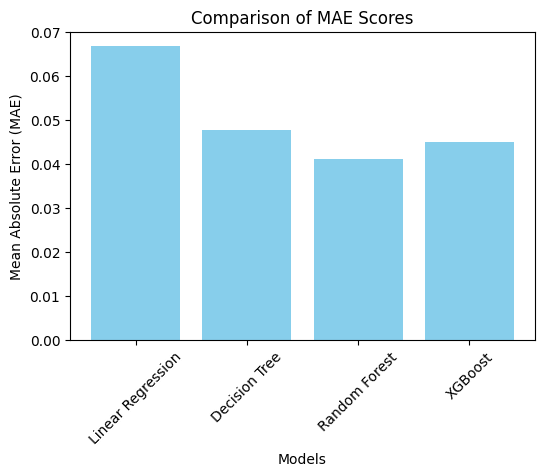

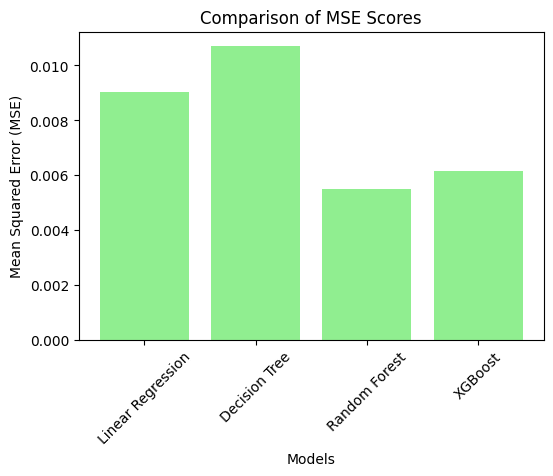

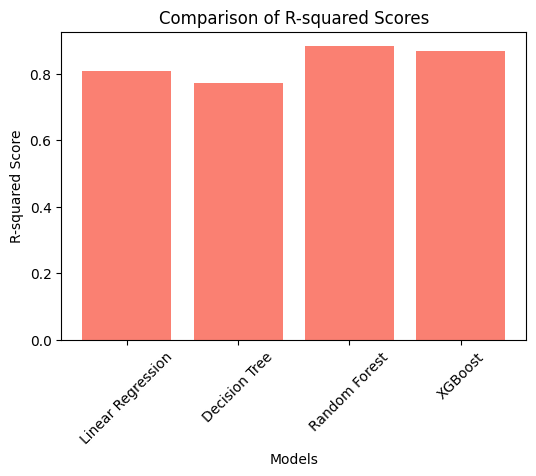

In [21]:
# Creates bar charts comparing model performance.
# Visual comparison is easier for presentations.

m.plot_metrics(models, mae_scores, mse_scores, r2_scores)

### DECISION TREE VISUALIZATION

Shows the structure of a Decision Tree:

- Each node represents a decision

- Leaf nodes represent predicted charges

- Helps explain model logic (interpretability)

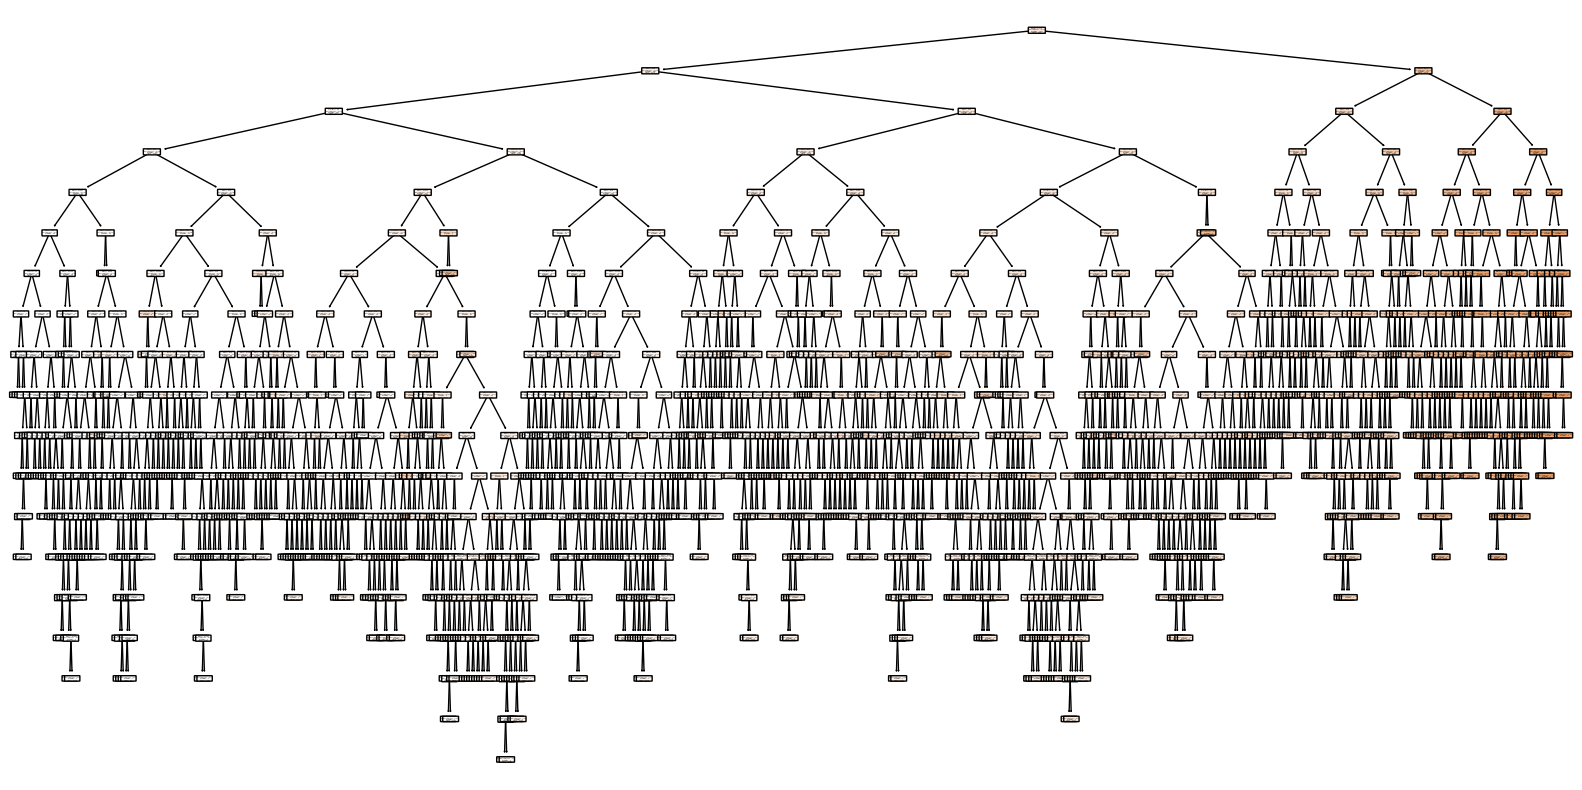

In [22]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(decision_tree=dt_model, feature_names=X_train.columns, filled=True, rounded=True)
plt.show()

### RANDOM FOREST TREES

Random Forest has many decision trees.

Here, you visualize one tree to understand how the forest decides.

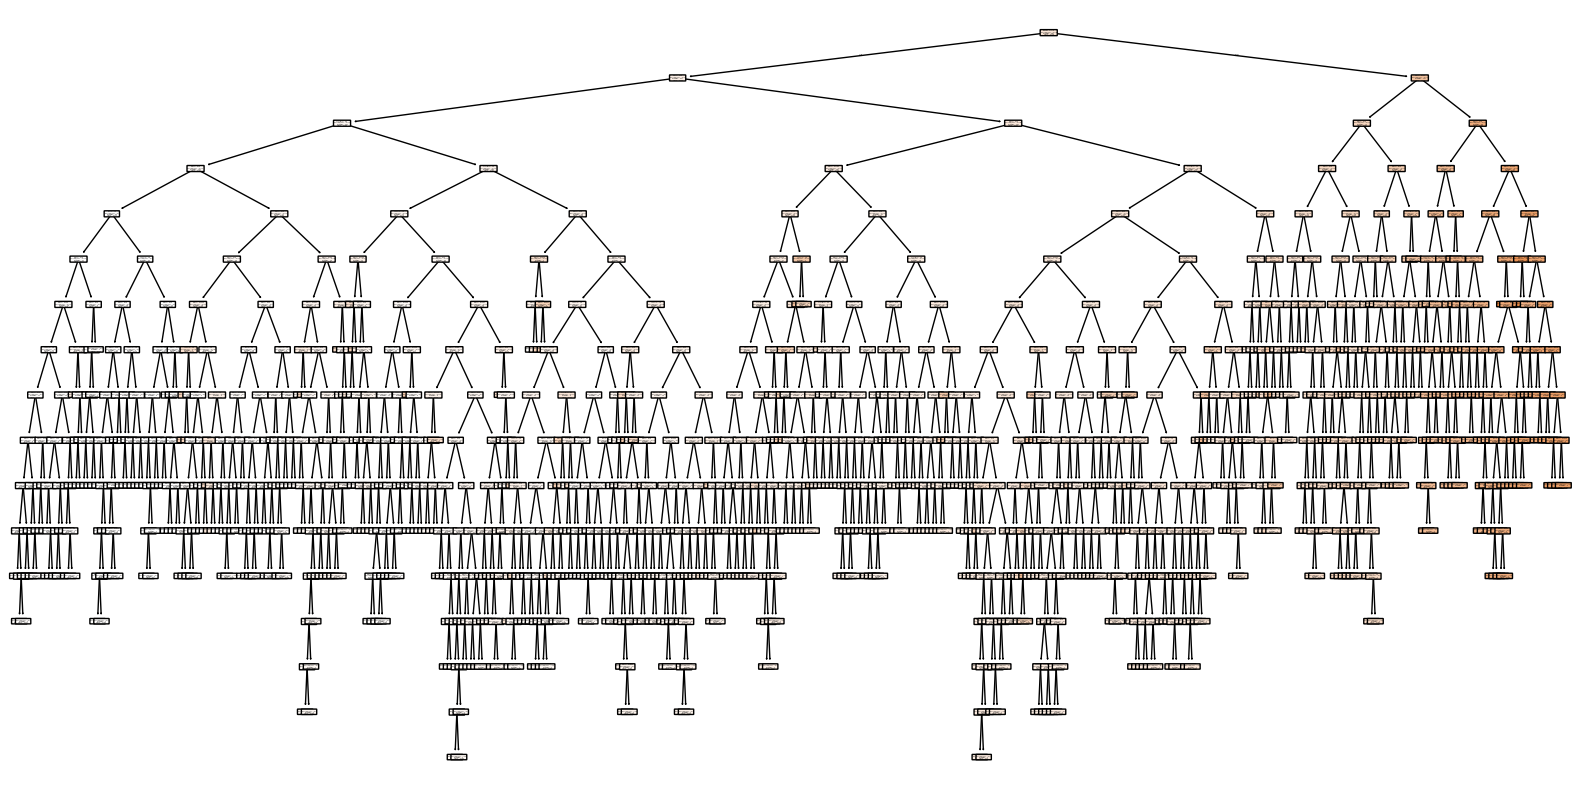

In [23]:
tree_index = 0
single_tree = rfr_model.estimators_[tree_index]

plt.figure(figsize=(20, 10))
plot_tree(single_tree, feature_names=X_train.columns, filled=True, rounded=True)
plt.show()

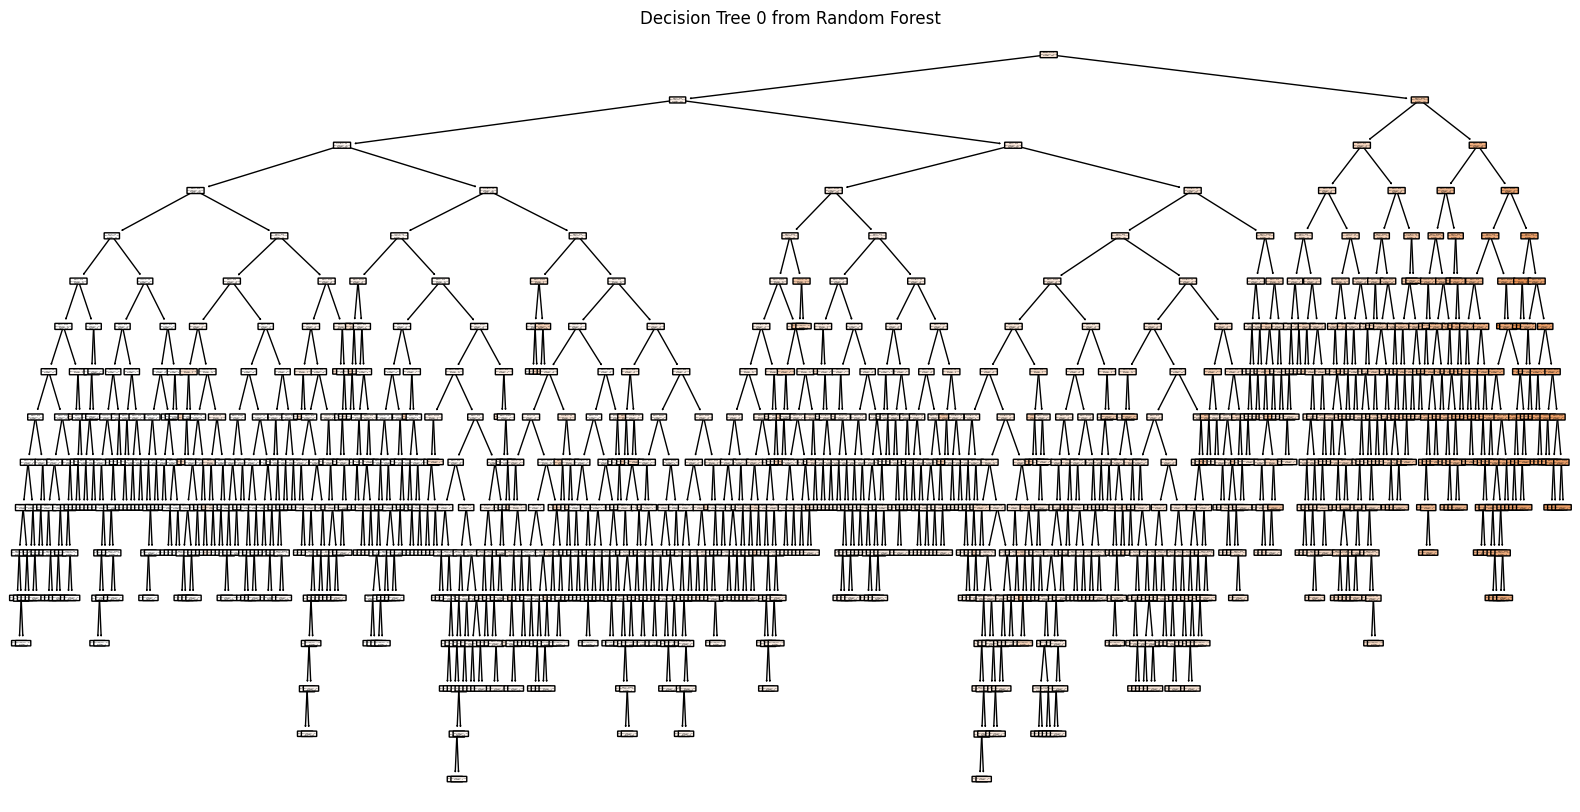

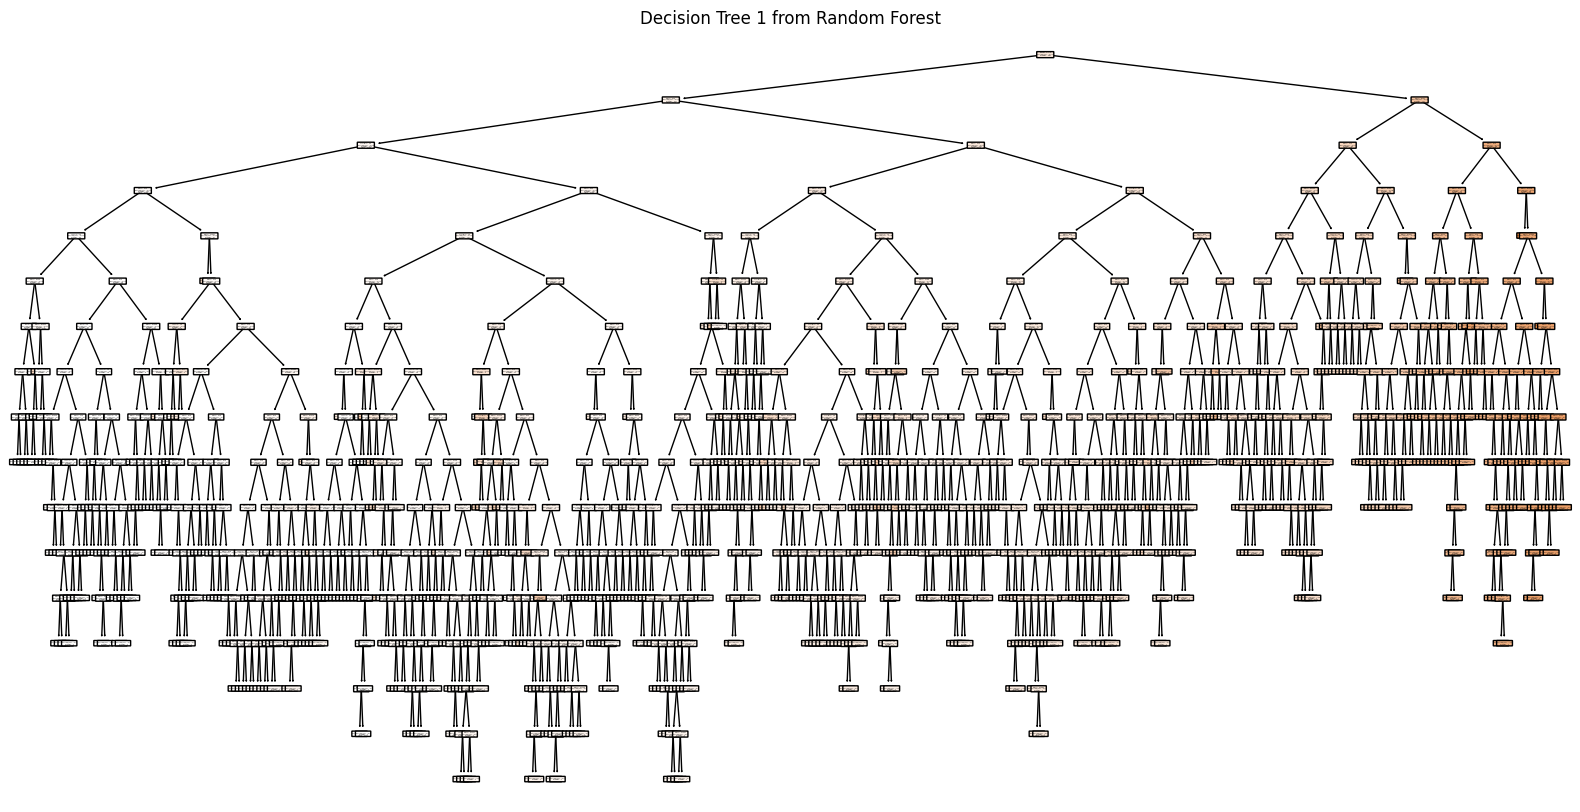

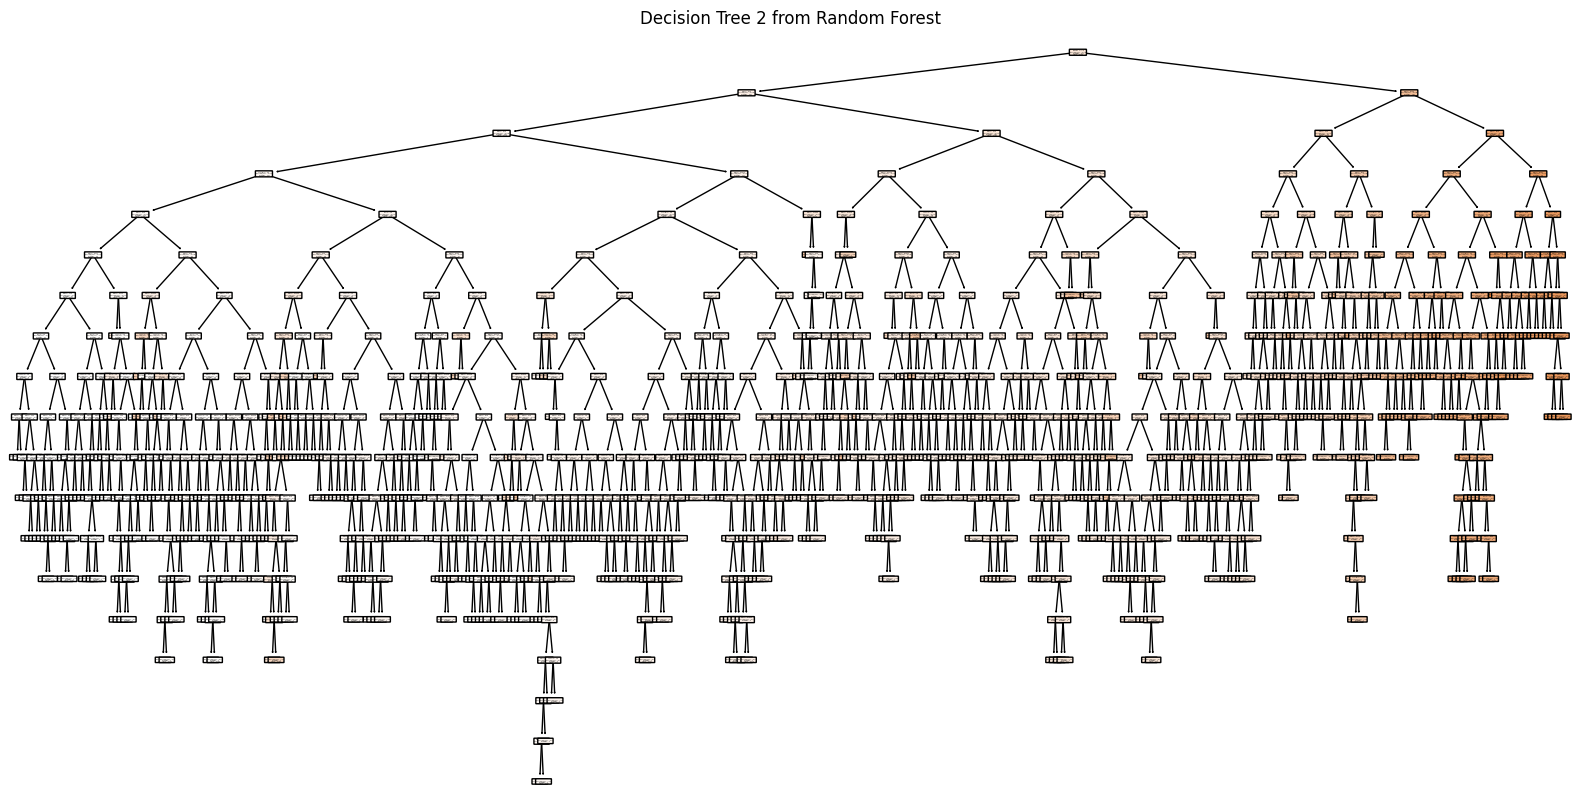

In [24]:
# Shows first 3 trees → demonstrates model diversity.
for tree_index in range(3):
    single_tree = rfr_model.estimators_[tree_index]
    plt.figure(figsize=(20, 10))
    plot_tree(single_tree, feature_names=X_train.columns, filled=True, rounded=True)
    plt.title(f"Decision Tree {tree_index} from Random Forest")
    plt.show()


### FEATURE IMPORTANCE

In [25]:
def plot_feature_importance(model, feature_names, model_name):
    feature_importance = pd.DataFrame(model.feature_importances_, index=feature_names, columns=["Importance"])
    feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

    plt.figure(figsize=(10, 6))
    feature_importance.plot(kind='bar', legend=False, color='skyblue')
    plt.title(f'Feature Importance for {model_name}')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.xticks(rotation=45)
    plt.show()

<Figure size 1000x600 with 0 Axes>

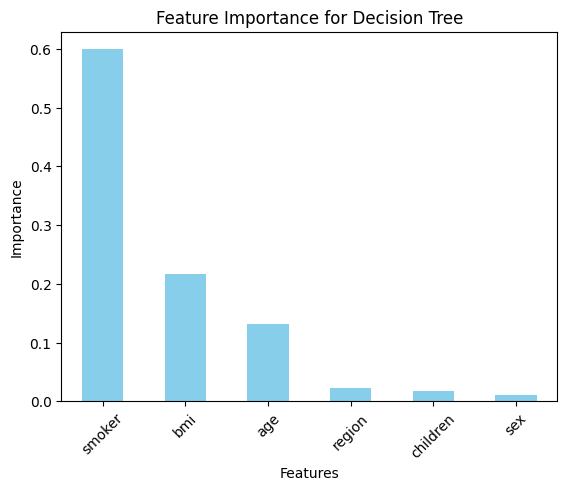

<Figure size 1000x600 with 0 Axes>

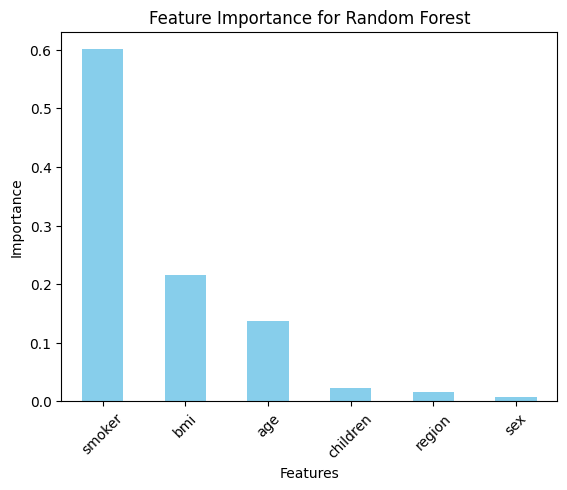

<Figure size 1000x600 with 0 Axes>

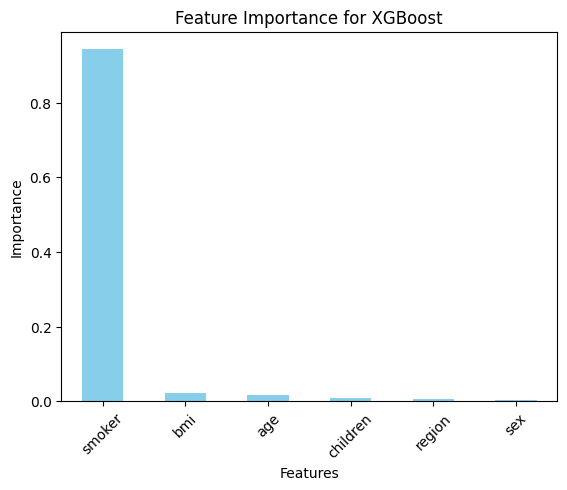

In [26]:
# Compares which features matter most across different models.

plot_feature_importance(dt_model, X_train.columns, "Decision Tree")
plot_feature_importance(rfr_model, X_train.columns, "Random Forest")
plot_feature_importance(xgb_model, X_train.columns, "XGBoost")

### HYPERPARAMETER TUNING

In [27]:
# Hyperparameters control HOW a model learns.
# GridSearchCV tests many combinations to find the best performing model.
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],          # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],          # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],          # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],            # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]                # Whether bootstrap samples are used when building trees
}

GridSearchCV tries every combination in param_grid.

cv=5 → performs 5-fold cross-validation.

scoring='r2' → selects the model with highest R².

In [29]:
# Initialize the RandomForestRegressor
# rfr_model = RandomForestRegressor(random_state=42)

# Set up the grid search
grid_search = GridSearchCV(estimator=rfr_model, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='r2')

# Fit the grid search model to the training data
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 216 candidates, totalling 648 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestR...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'bootstrap': [True, False], 'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'r2'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",3
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and pa

In [ ]:
# Shows the winning model settings + performance.
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best R-squared Score: {grid_search.best_score_}")

Best Hyperparameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best R-squared Score: 0.8363203827569239


### APPLYING BEST MODEL

You retrain the best model and evaluate it again on the test set.

In [ ]:
# Train the model using the best parameters
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

best_rfr_model = grid_search.best_estimator_

# Fit the best model on the training data
best_rfr_model.fit(X_train, y_train)

# Make predictions and evaluate the performance
y_pred_best = best_rfr_model.predict(X_test)
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

# Print the results
print(f"MAE: {mae_best}, MSE: {mse_best}, R2: {r2_best}")


MAE: 0.038861938891393236, MSE: 0.004786376584372034, R2: 0.8977678981793442


Visualizes one decision tree inside the tuned Random Forest.

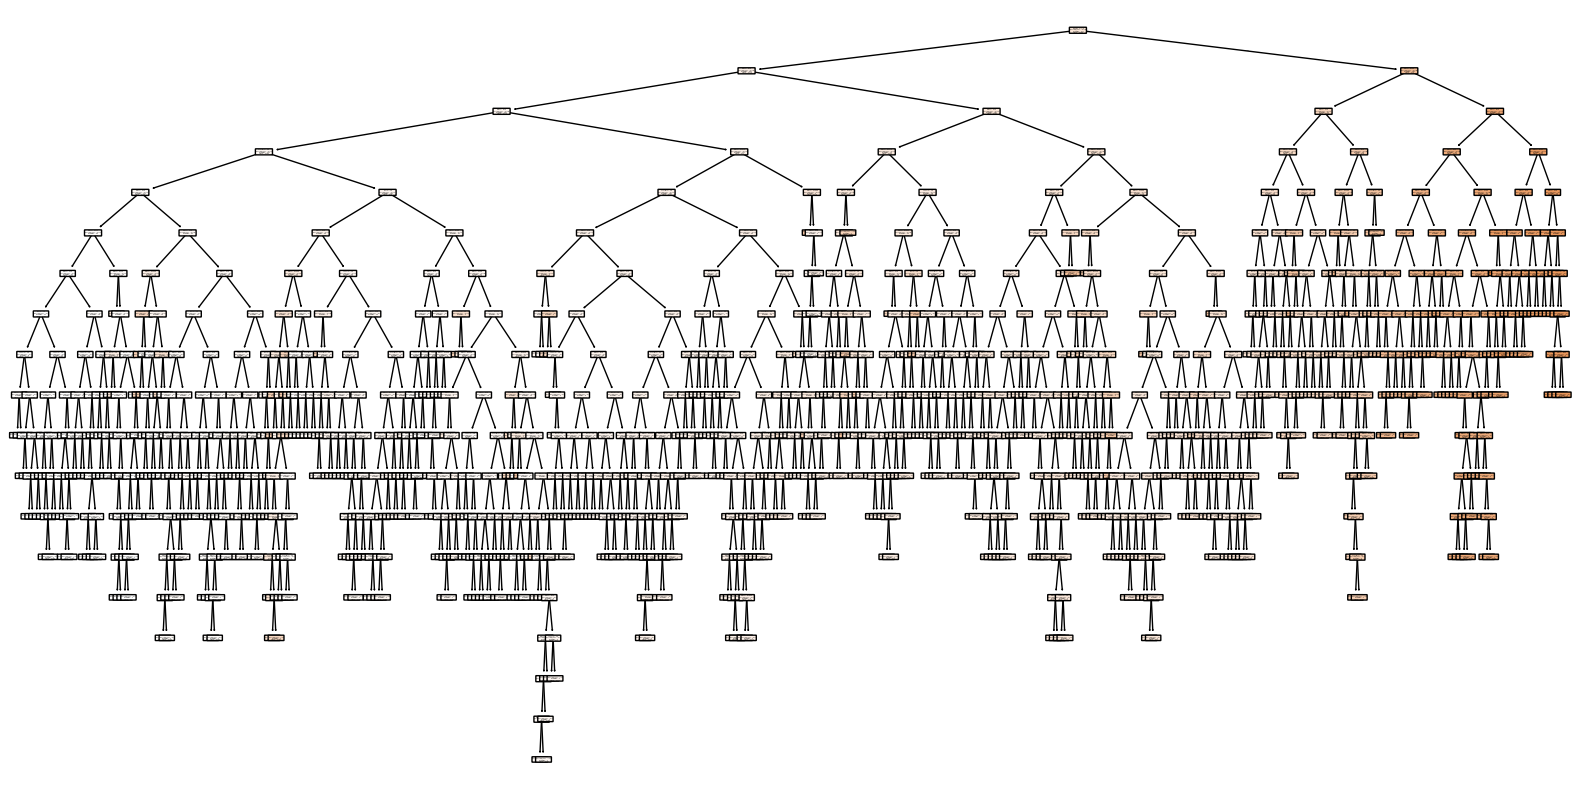

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(single_tree, feature_names=X_train.columns, filled=True, rounded=True)
plt.show()

### PRINT DECISION RULES

This function prints the actual decision rules the tree uses.

Useful for human interpretation.

In [ ]:
from sklearn.tree import _tree

# Extract the best Random Forest model from GridSearchCV
best_rfr_model = grid_search.best_estimator_

# Extract a single decision tree from the Random Forest
tree_index = 0  # Index of the tree to visualize
single_tree = best_rfr_model.estimators_[tree_index]

# Function to display the decision tree criteria
def print_tree_criteria(tree, feature_names):
    # Access the tree structure
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    
    def recurse(node):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print(f"Node {node}: {name} <= {threshold:.2f}")
            recurse(tree_.children_left[node])
            print(f"Node {node}: {name} > {threshold:.2f}")
            recurse(tree_.children_right[node])
        else:
            print(f"Leaf node {node}: Predicted value {tree_.value[node]}")

    recurse(0)  # Start from the root node

# Print the criteria for each split in the selected tree
print_tree_criteria(single_tree, X_train.columns)

Node 0: smoker <= 0.50
Node 1: age <= 42.50
Node 2: children <= 0.50
Node 3: age <= 22.50
Node 4: sex <= 0.50
Node 5: bmi <= 37.80
Node 6: bmi <= 33.59
Node 7: region <= 1.50
Node 8: bmi <= 27.03
Leaf node 9: Predicted value [[0.02295497]]
Node 8: bmi > 27.03
Leaf node 10: Predicted value [[0.01734797]]
Node 7: region > 1.50
Node 11: age <= 19.50
Leaf node 12: Predicted value [[0.00872358]]
Node 11: age > 19.50
Leaf node 13: Predicted value [[0.01240026]]
Node 6: bmi > 33.59
Leaf node 14: Predicted value [[0.05333281]]
Node 5: bmi > 37.80
Leaf node 15: Predicted value [[0.00970866]]
Node 4: sex > 0.50
Node 16: region <= 1.50
Node 17: age <= 20.50
Node 18: region <= 0.50
Leaf node 19: Predicted value [[0.0096418]]
Node 18: region > 0.50
Leaf node 20: Predicted value [[0.00837147]]
Node 17: age > 20.50
Leaf node 21: Predicted value [[0.0153035]]
Node 16: region > 1.50
Node 22: age <= 18.50
Leaf node 23: Predicted value [[0.00035904]]
Node 22: age > 18.50
Leaf node 24: Predicted value [[0

This means:

If a person is:

non-smoker

younger than 42

has no children

younger than 22

sex encoded as female

BMI low
➡️ The model predicts about 0.02295 (scaled).

So this tree is basically learning:

“Young, non-smoker, low BMI → very low medical cost"

'''
Node 0: smoker > 0.50
Node 180: bmi <= 30.01
Node 181: age <= 46.00
Node 182: age <= 29.50
Node 183: bmi <= 23.20
Leaf node 184: Predicted value [[0.22224]]
'''

If a person is:

smoker

BMI ≤ 30

age ≤ 46

age ≤ 29

BMI ≤ 23

Then predicted cost ≈ 0.22224 (scaled).

This is 10x larger than the earlier non-smoker leaf (~0.02).
This means the tree learned:

“Smokers, even young ones, cost MUCH more.”